In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15 , 5)

# **Data Importation**

In [3]:
df = pd.read_csv('/content/movies.csv')

# **Data Exploration & Transformation**

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
df.isna().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [8]:
df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
for col in df.columns:
  Pct_missing = np.mean(df[col].isna())
  print('{} - {}%'.format(col , Pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
df.dtypes

,0
name,object
rating,object
genre,object
year,int64
released,object
score,float64
votes,float64
director,object
writer,object
star,object


In [16]:
df['budget'] = df['budget'].replace('nan' , 0)

In [18]:
df['gross'] = df['gross'].replace('nan' , 0)

In [20]:
df['budget'].sum()

np.float64(195637549431.0)

In [23]:
df.shape

(7668, 14)

In [22]:
df.drop(columns = 'year' , inplace = True)

In [39]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relaesed_year
0,The Shining,R,Drama,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [34]:
df['released'] = df['released'].str.split(' (' , regex = False).str[0]

In [38]:
df['relaesed_year'] = df['released'].str.split(',').str[1]

In [41]:
pd.options.display.float_format = '{:,.0f}'.format


In [136]:
df.sort_values(by = ['gross'] , inplace = False , ascending = True).head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relaesed_year
3203,6990,5,4,2457,6,"5,800",961,229,2758,55,"15,000,000",309,821,85,17
2417,3406,-1,6,71,7,"5,100",33,1718,2563,27,"11,900,000",596,796,134,13
7580,4664,3,5,1627,5,735,1445,2203,2278,55,NaN,682,1992,93,40
7625,6720,-1,4,1013,6,320,2546,2565,1915,55,NaN,790,2308,104,39
3818,3360,6,4,986,6,"5,200",730,1123,2319,54,NaN,"1,400",477,103,21


In [44]:
pd.set_option('display.max_rows' , None)

In [50]:
df.shape

(7668, 15)

In [49]:
df = df.drop_duplicates()

# **Univariate Analysis**

In [59]:
def Text(x):
  print(df[x].nunique())
  print('====================================================')
  print(df[x].unique())
  print('====================================================')
  print(df[x].value_counts().head())
  print('====================================================')
  print(df[x].value_counts().head().plot(kind = 'bar'))
  plt.title(f'\n{x} Distribution\n' , fontsize = 14 , fontweight = 'bold')
  plt.xlabel(f'\n{x}\n' , fontsize = 12)
  plt.ylabel('\nFrequency\n' , fontsize = 12 )
  plt.xticks(rotation = 0)
  plt.show()

59
['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Libya' 'Italy' 'Soviet Union' 'France' 'Hong Kong'
 'South Korea' 'Sweden' 'Spain' 'Mexico' 'Switzerland' 'Netherlands'
 'New Zealand' 'Philippines' 'Israel' 'Japan' 'Hungary' 'Brazil'
 'Yugoslavia' 'Argentina' 'Taiwan' 'Ireland' 'Denmark' 'Germany' 'Iran'
 'China' 'Belgium' 'Austria' 'Portugal' 'Vietnam' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Greece' 'Czech Republic'
 'Norway' 'India' 'Jamaica' 'Aruba' 'Thailand' 'Colombia' 'Romania' nan
 'United Arab Emirates' 'Indonesia' 'Turkey' 'Serbia' 'Poland' 'Kenya'
 'Finland' 'Iceland' 'Chile' 'Panama' 'Malta' 'Lebanon']
country
United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


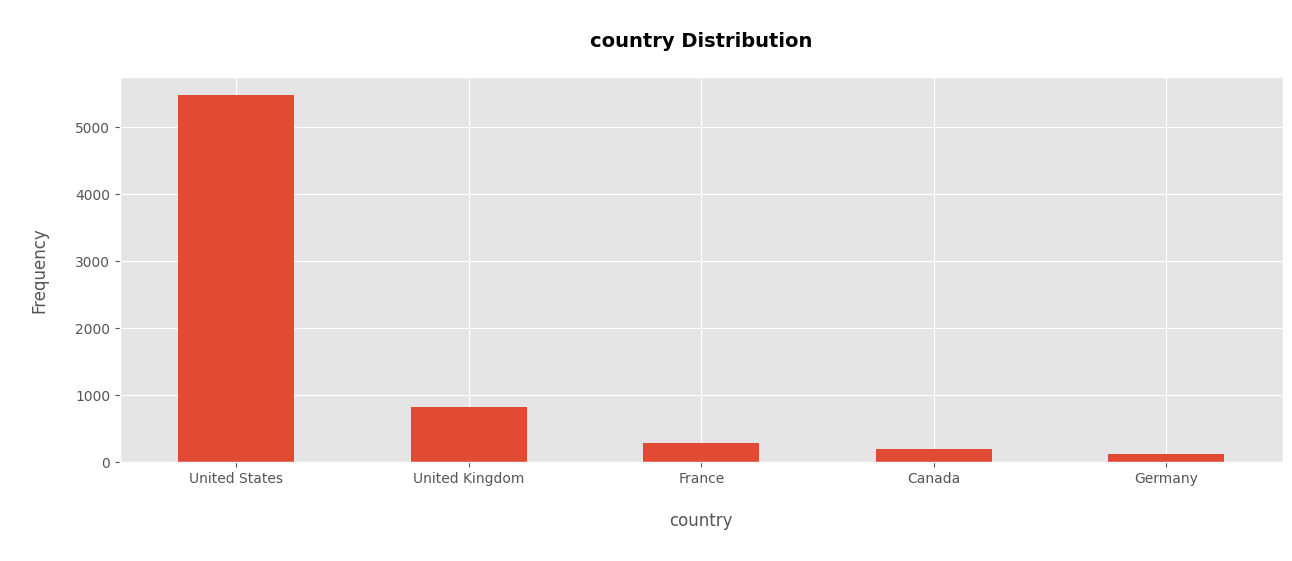

In [60]:
Text('country')

12
['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']
rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


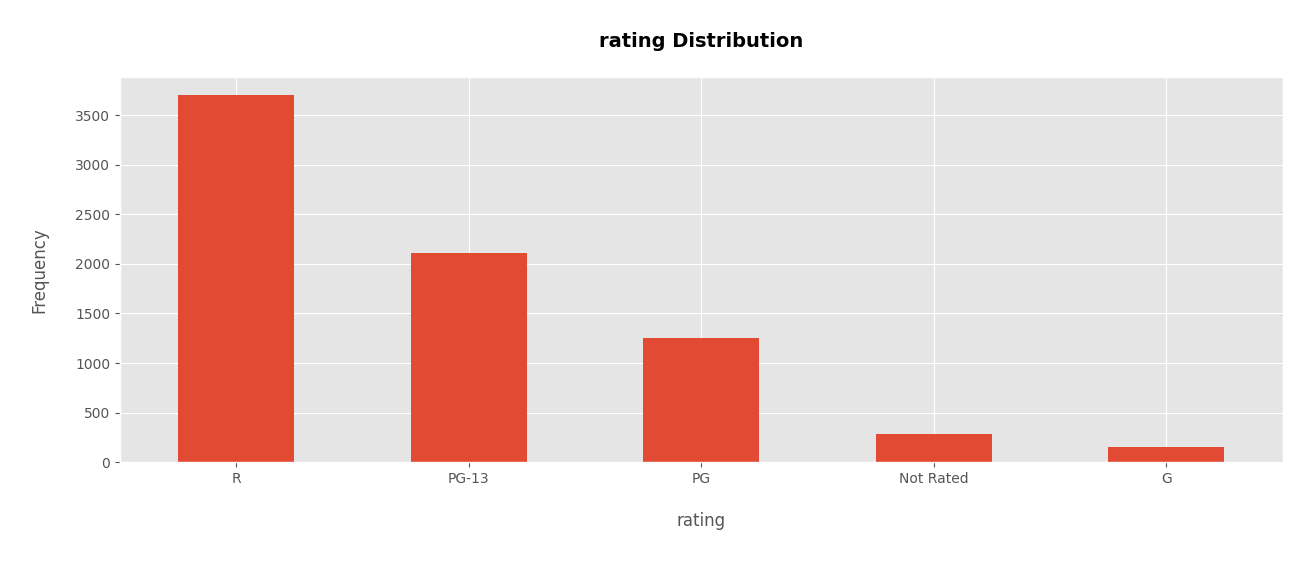

In [61]:
Text('rating')

19
['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']
genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


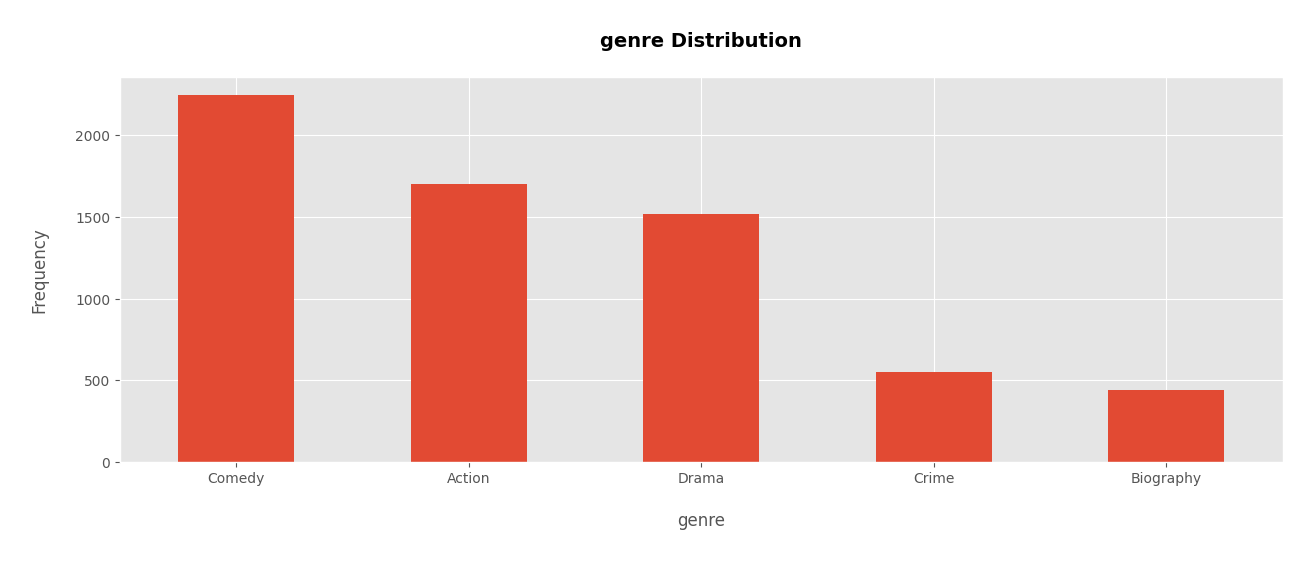

In [62]:
Text('genre')

2949
['Stanley Kubrick' 'Randal Kleiser' 'Irvin Kershner' ... 'Nkanya Nkwai'
 'James Randall' 'Pereko Mosia']
director
Woody Allen         38
Clint Eastwood      31
Directors           28
Steven Spielberg    27
Ron Howard          24
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


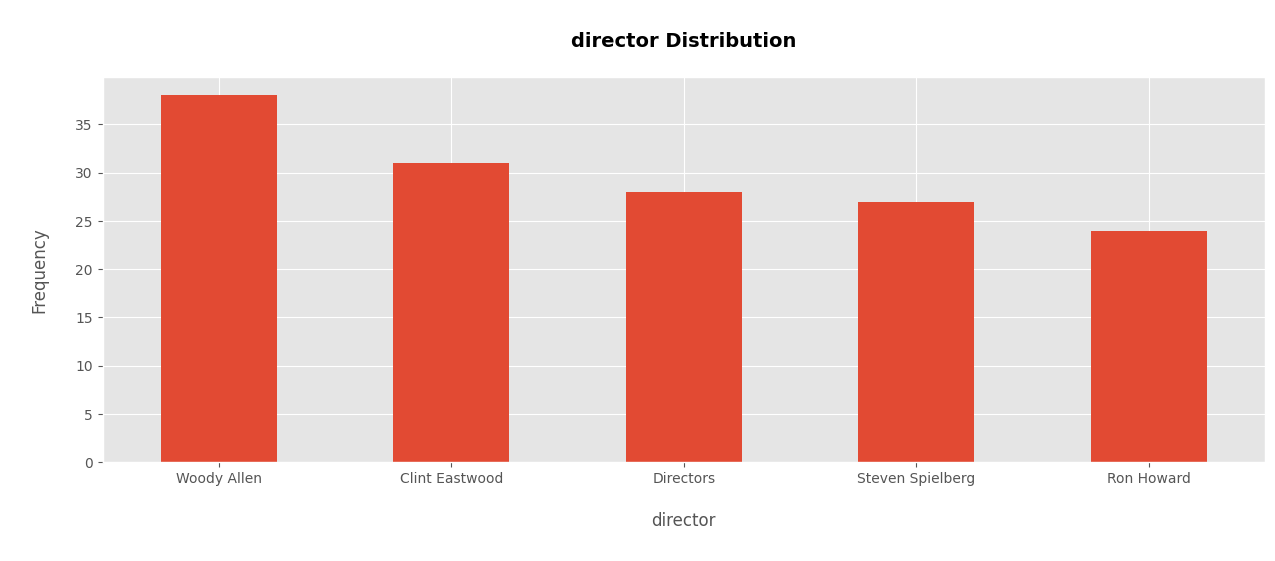

In [64]:
Text('director')

4535
['Stephen King' 'Henry De Vere Stacpoole' 'Leigh Brackett' ...
 'Lynno Lovert' 'James Randall' 'Pereko Mosia']
writer
Woody Allen     37
Stephen King    31
Luc Besson      26
John Hughes     25
David Mamet     15
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


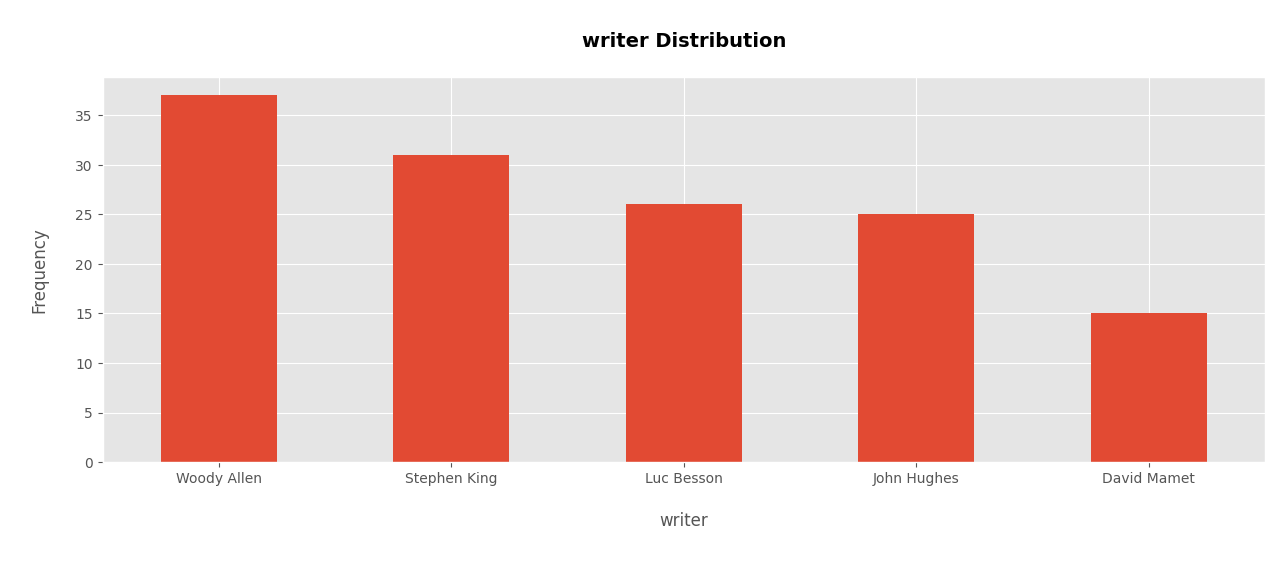

In [67]:
Text('writer')

2814
['Jack Nicholson' 'Brooke Shields' 'Mark Hamill' ... 'Onyama Laura'
 'Christina Roz' 'Siyabonga Mabaso']
star
Nicolas Cage         43
Robert De Niro       41
Tom Hanks            41
Denzel Washington    37
Bruce Willis         34
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


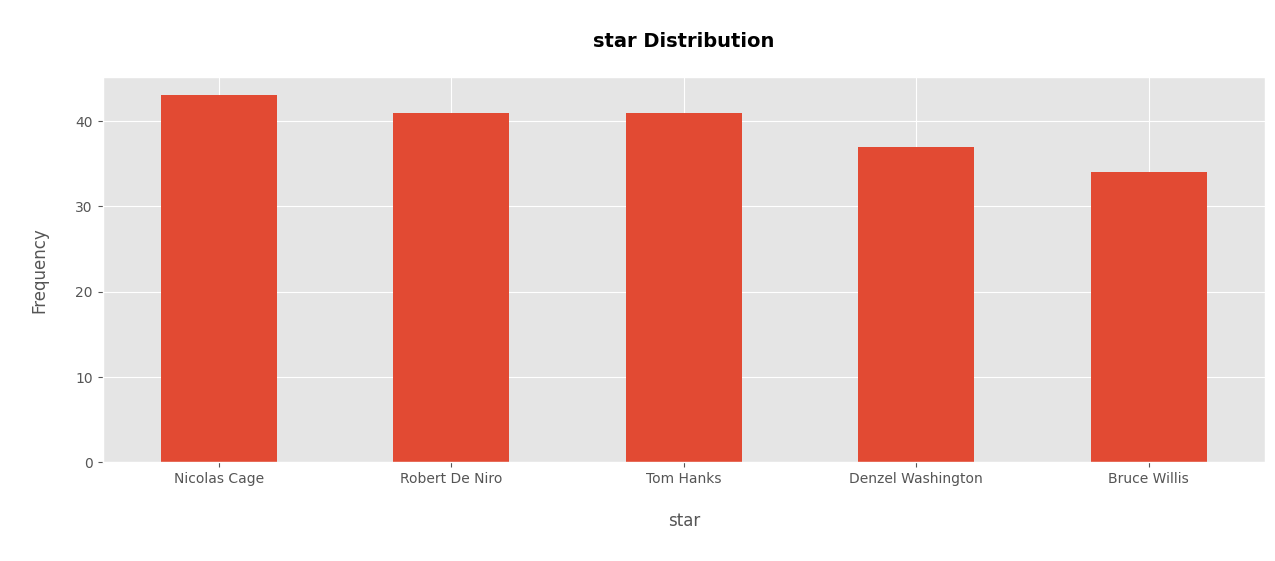

In [69]:
Text('star')

59
['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Libya' 'Italy' 'Soviet Union' 'France' 'Hong Kong'
 'South Korea' 'Sweden' 'Spain' 'Mexico' 'Switzerland' 'Netherlands'
 'New Zealand' 'Philippines' 'Israel' 'Japan' 'Hungary' 'Brazil'
 'Yugoslavia' 'Argentina' 'Taiwan' 'Ireland' 'Denmark' 'Germany' 'Iran'
 'China' 'Belgium' 'Austria' 'Portugal' 'Vietnam' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Greece' 'Czech Republic'
 'Norway' 'India' 'Jamaica' 'Aruba' 'Thailand' 'Colombia' 'Romania' nan
 'United Arab Emirates' 'Indonesia' 'Turkey' 'Serbia' 'Poland' 'Kenya'
 'Finland' 'Iceland' 'Chile' 'Panama' 'Malta' 'Lebanon']
country
United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


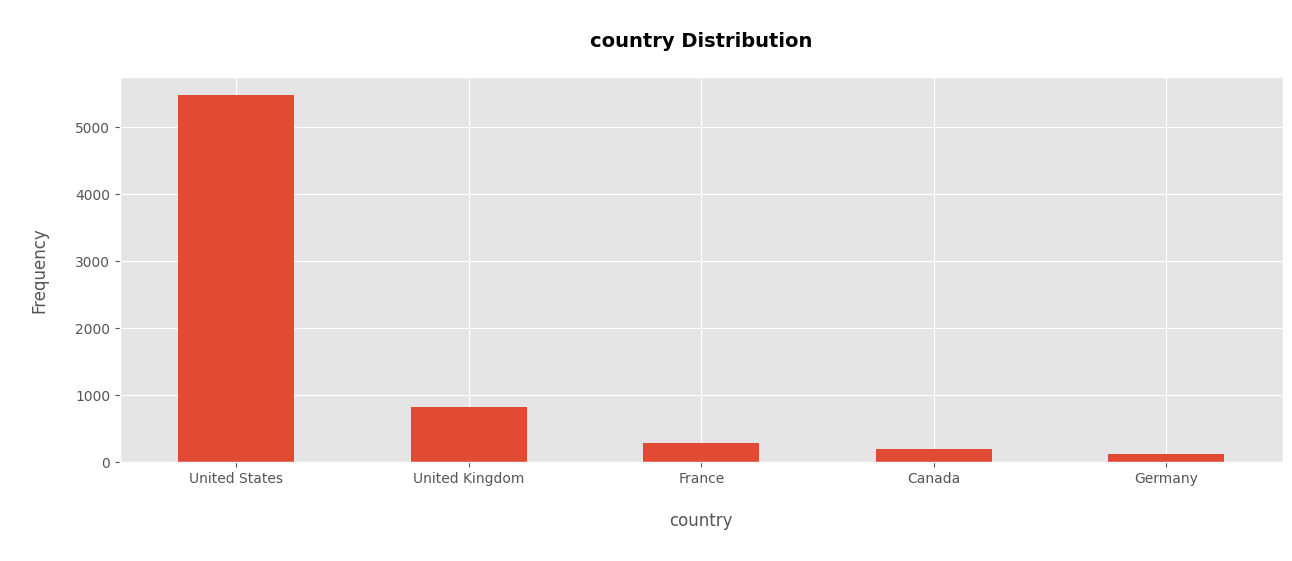

In [71]:
Text('country')

2385
['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ... 'Dow Jazz Films'
 'Embi Productions' 'PK 65 Films']
company
Universal Pictures       377
Warner Bros.             334
Columbia Pictures        332
Paramount Pictures       320
Twentieth Century Fox    240
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


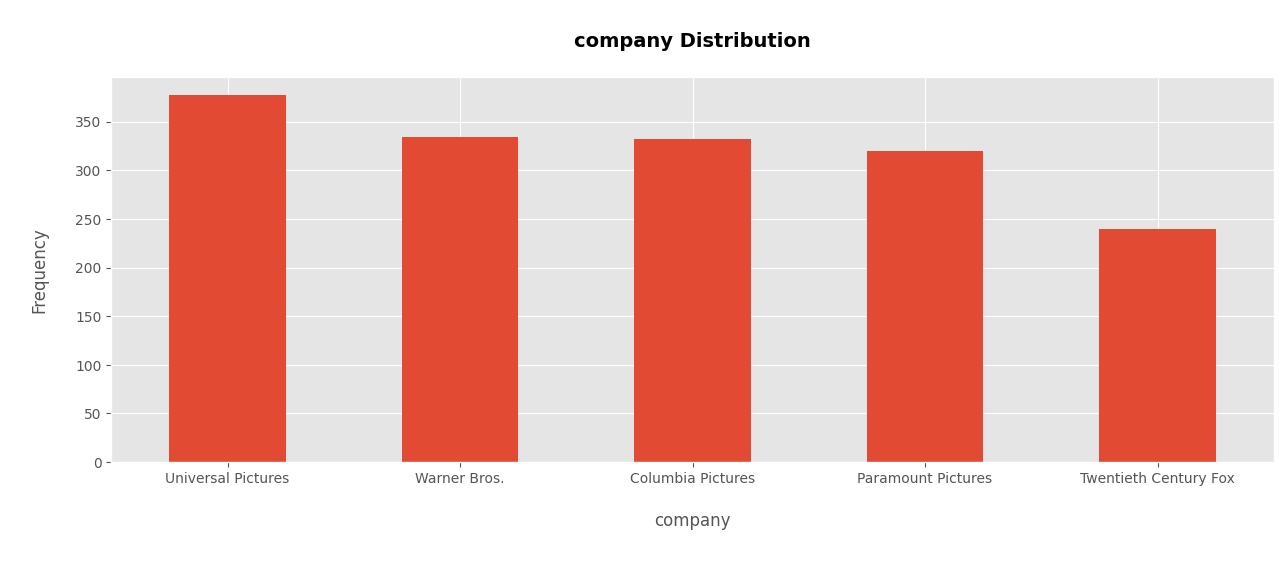

In [73]:
Text('company')

# **Bivariate Analysis**

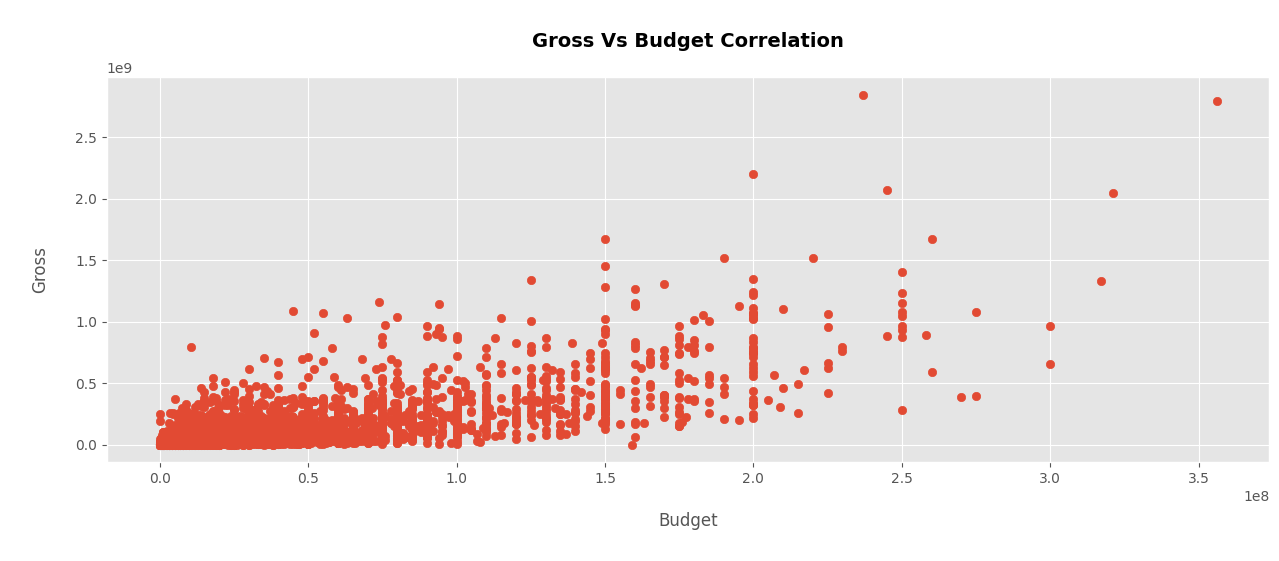

In [74]:
plt.scatter(x = df['budget'] , y = df['gross'])
plt.title(f'\nGross Vs Budget Correlation\n' , fontsize = 14 , fontweight = 'bold')
plt.xlabel(f'\nBudget\n' , fontsize = 12)
plt.ylabel('\nGross\n' , fontsize = 12 )
plt.xticks(rotation = 0)
plt.show()

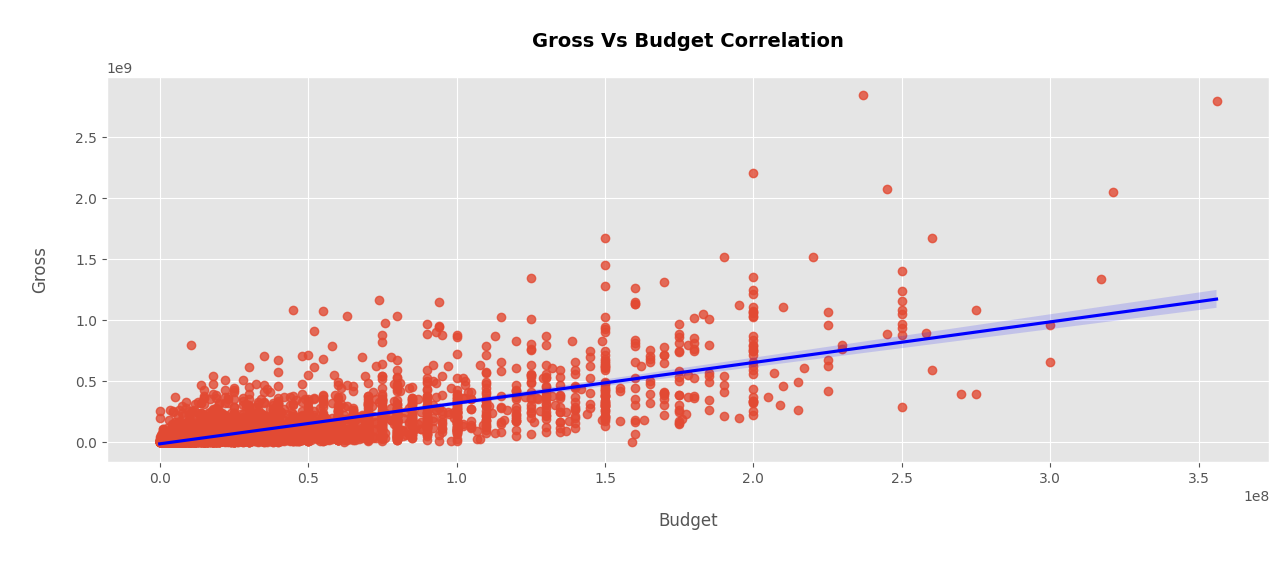

In [79]:
sns.regplot(x = 'budget' , y = 'gross' , data = df , line_kws = {'color' : 'blue'})
plt.title(f'\nGross Vs Budget Correlation\n' , fontsize = 14 , fontweight = 'bold' )
plt.xlabel(f'\nBudget\n' , fontsize = 12)
plt.ylabel('\nGross\n' , fontsize = 12 )
plt.xticks(rotation = 0)
plt.show()

In [87]:
df.dtypes

,0
name,object
rating,object
genre,object
released,object
score,float64
votes,float64
director,object
writer,object
star,object
country,object


In [89]:
data = pd.read_excel('/content/Sales.xlsx')

In [96]:
data_corr = data[['Unit Cost' , 'Price' , 'Order Qty' , 'Cost of Sales' , 'Sales' , 'Profit']].corr()

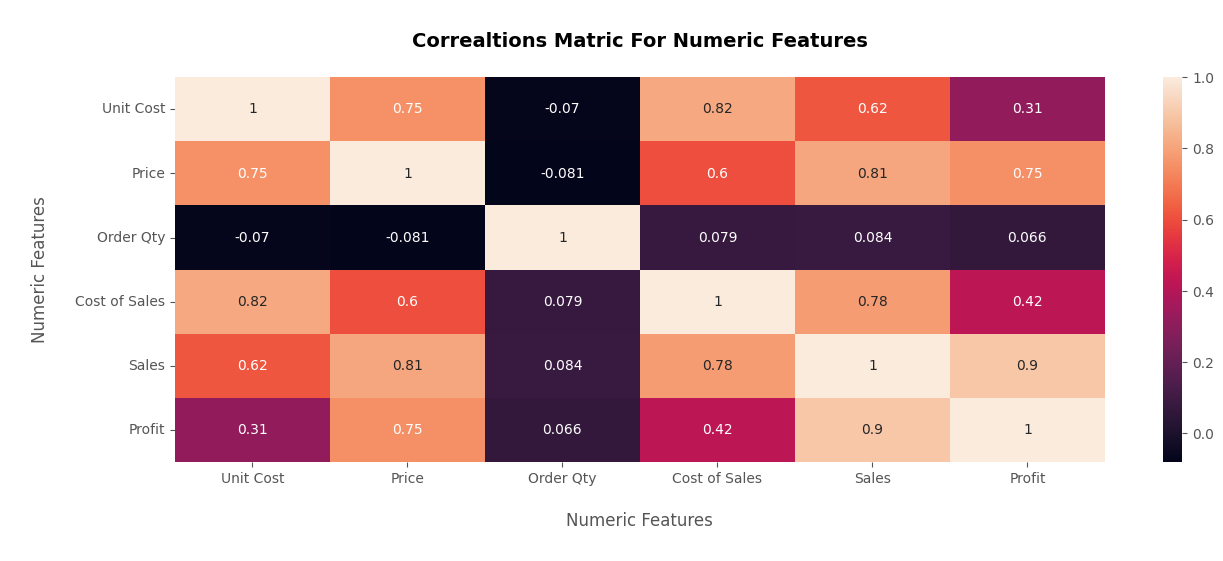

In [98]:
sns.heatmap(data_corr , annot = True)
plt.title(f'\nCorrealtions Matric For Numeric Features\n' , fontsize = 14 , fontweight = 'bold' )
plt.xlabel(f'\nNumeric Features\n' , fontsize = 12)
plt.ylabel('\nNumeric Features\n' , fontsize = 12 )
plt.xticks(rotation = 0)
plt.show()

In [99]:
data.head()

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
0,15000,2023-11-14,11,16,20,219,318,99,Online,No Discount,Contoso USB Wave Multi-media Keyboard E280 Black,"Contoso, Ltd",Computers Accessories,Computers,North America,Spring,United States
1,14999,2023-01-18,113,279,12,"1,359","3,348","1,989",Online,Asian Summer Promotion,Adventure Works LCD20W M240 Black,Adventure Works,Monitors,Computers,Asia,Beijing,China
2,14998,2022-08-02,364,588,13,"4,727","7,409","2,682",Online,North America Holiday Promotion,"A. Datum SLR Camera 35"" X358 Gold",A. Datum Corporation,Digital SLR Cameras,Cameras and camcorders,North America,Ithaca,United States
3,14997,2022-01-02,55,999,10,554,"9,990","9,436",Online,No Discount,WWI Projector 720p DLP56 White,Wide World Importers,Projectors & Screens,Computers,Europe,Paris,France
4,14996,2021-12-16,16,25,12,195,300,105,Online,Asian Summer Promotion,Contoso USB Cable M250 Blue,"Contoso, Ltd",Cameras & Camcorders Accessories,Cameras and camcorders,Asia,Osaka,Japan


In [100]:
df_normalized = df

for col_name in df_normalized.columns:
  if(df_normalized[col_name].dtype == 'object'):
    df_normalized[col_name] = df_normalized[col_name].astype('category')
    df_normalized[col_name] = df_normalized[col_name].cat.codes



In [103]:
df_normalized.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relaesed_year
0,6587,6,6,1510,8,"927,000",2589,4014,1047,54,"19,000,000","46,998,772",2319,146,0
1,5573,6,1,1311,6,"65,000",2269,1632,327,55,"4,500,000","58,853,106",731,104,0
2,5142,4,0,1568,9,"1,200,000",1111,2567,1745,55,"18,000,000","538,375,067",1540,124,0
3,286,4,4,1311,8,"221,000",1301,2000,2246,55,"3,500,000","83,453,539",1812,88,0
4,1027,6,4,1360,7,"108,000",1054,521,410,55,"6,000,000","39,846,344",1777,98,0


In [106]:
Correlation_Matrix = df_normalized.corr(method = 'pearson')

In [107]:
Correlation_Matrix

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relaesed_year
name,1,-0,0,-0,0,0,0,0,0,-0,0,0,0,0,0
rating,-0,1,0,0,-0,0,0,-0,0,0,-0,-0,-0,0,0
genre,0,0,1,0,0,-0,-0,0,-0,-0,-0,-0,-0,-0,-0
released,-0,0,0,1,0,0,-0,-0,0,-0,0,0,-0,0,-0
score,0,-0,0,0,1,0,0,0,-0,-0,0,0,0,0,0
votes,0,0,-0,0,0,1,0,0,-0,0,0,1,0,0,0
director,0,0,-0,-0,0,0,1,0,0,0,-0,-0,0,0,-0
writer,0,-0,0,-0,0,0,0,1,0,0,-0,-0,0,-0,-0
star,0,0,-0,0,-0,-0,0,0,1,-0,-0,-0,0,0,-0
country,-0,0,-0,-0,-0,0,0,0,-0,1,0,0,0,-0,-0


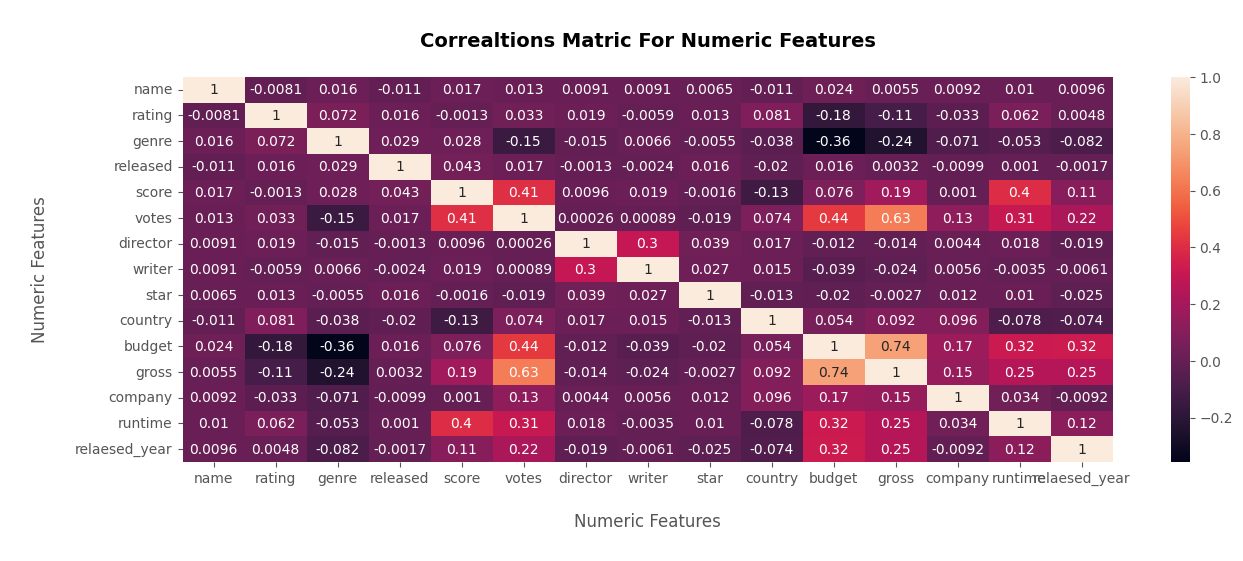

In [109]:
sns.heatmap(Correlation_Matrix , annot = True )
plt.title(f'\nCorrealtions Matric For Numeric Features\n' , fontsize = 14 , fontweight = 'bold' )
plt.xlabel(f'\nNumeric Features\n' , fontsize = 12)
plt.ylabel('\nNumeric Features\n' , fontsize = 12 )
plt.xticks(rotation = 0)
plt.show()

In [115]:
corrmatric = df_normalized.corr()

corrpairs = corrmatric.unstack()

sortedpairs = corrpairs.sort_values()

highcorr = sortedpairs[(sortedpairs) > 0.5]

In [116]:
highcorr

votes          gross           1
gross          votes           1
               budget          1
budget         gross           1
score          score           1
votes          votes           1
rating         rating          1
name           name            1
genre          genre           1
released       released        1
writer         writer          1
director       director        1
star           star            1
country        country         1
gross          gross           1
budget         budget          1
company        company         1
runtime        runtime         1
relaesed_year  relaesed_year   1
dtype: float64

In [117]:
data_normalized = data

for col_name in data_normalized.columns:
  if(data_normalized[col_name].dtype == 'object'):
    data_normalized[col_name] = data_normalized[col_name].astype('category')
    data_normalized[col_name] = data_normalized[col_name].cat.codes


In [119]:
data_normalized.corr().head()

,Order ID,Order Date,Unit Cost,Price,Order Qty,Cost of Sales,Sales,Profit,Channel,Promotion Name,Product Name,Manufacturer,Product Sub Category,Product Category,Region,City,Country
Order ID,1,-0,0,0,-0,-0,-0,-0,0,0,-0,-0,-0,0,0,0,0
Order Date,-0,1,0,0,0,0,0,0,-0,-0,0,0,-0,0,-0,-0,-0
Unit Cost,0,0,1,1,-0,1,1,0,0,-0,0,0,0,0,-0,0,-0
Price,0,0,1,1,-0,1,1,1,0,-0,0,0,0,0,-0,0,-0
Order Qty,-0,0,-0,-0,1,0,0,0,0,-0,-0,-0,-0,-0,-0,-0,-0


In [120]:
corrmatric1 = data_normalized.corr()

corrpairs1 = corrmatric1.unstack()

sortedpairs1 = corrpairs1.sort_values()

highcorr1 = sortedpairs1[(sortedpairs1) > 0.5]

In [123]:
highcorr1.head()

,,0
Price,Cost of Sales,1
Cost of Sales,Price,1
Country,Promotion Name,1
Promotion Name,Country,1
Sales,Unit Cost,1
